<a href="https://colab.research.google.com/github/akilawickey/IT-5437/blob/main/Assignment1_IT5437.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

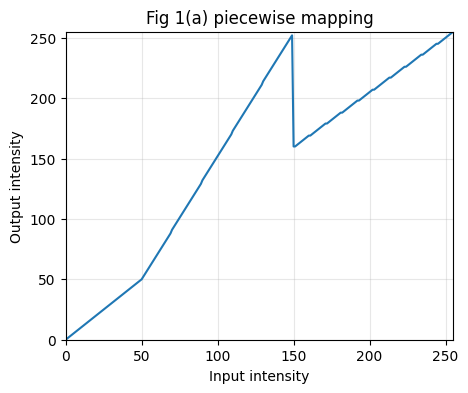

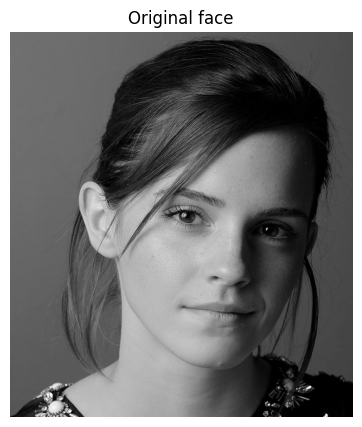

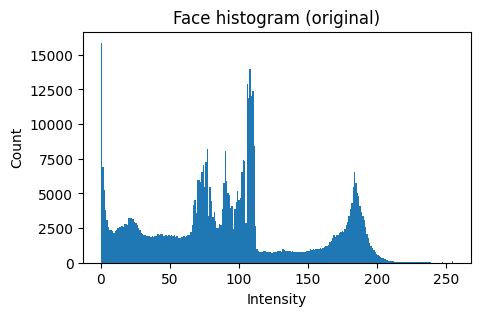

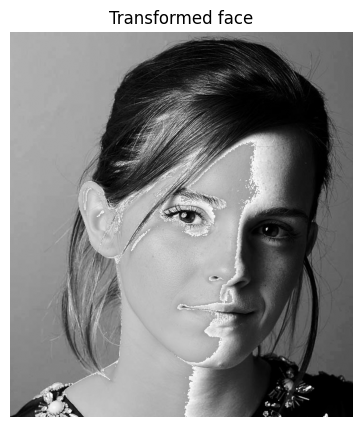

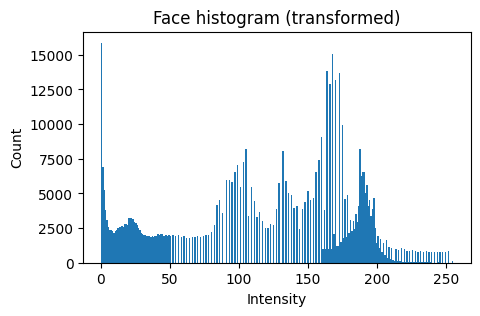

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Basic helper methods
def imread_gray(path):
    """Read as 8-bit grayscale [0..255]."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Cannot read: {path}")
    return img

def apply_lut(img, lut_1d):
    """Apply 256-entry lookup table to an 8-bit image."""
    lut = np.asarray(lut_1d, dtype=np.uint8)
    return cv2.LUT(img, lut)

def piecewise_lut(points):
    """
    Build a 256-length LUT from piecewise-linear control points.
    points: list of (x_in, y_out) with 0<=x_in<=255 and 0<=y_out<=255,
            sorted by x_in, can include intentional 'jumps' (same x twice).
    """
    xs, ys = zip(*points)
    xs, ys = np.array(xs, float), np.array(ys, float)

    lut = np.zeros(256, float)
    i = 0
    while i < len(xs) - 1:
        x0, y0 = xs[i], ys[i]
        x1, y1 = xs[i+1], ys[i+1]

        # handle vertical jump (same x twice)
        if x1 == x0:
            lut[int(x0)] = y0
            i += 1
            continue

        # linear segment
        m = (y1 - y0) / (x1 - x0)
        x_range = np.arange(int(np.ceil(x0)), int(np.floor(x1)) + 1)
        lut[x_range] = m * (x_range - x0) + y0
        i += 1

    # fill left/right ends and clamp
    lut[:int(xs[0])] = ys[0]
    lut[int(xs[-1]):] = ys[-1]
    lut = np.clip(lut, 0, 255).astype(np.uint8)
    return lut

def show_img(title, img):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title); plt.axis('off'); plt.show()

def show_hist(img, title="Histogram"):
    plt.figure(figsize=(5,3))
    plt.hist(img.ravel(), bins=256, range=(0,255))
    plt.title(title); plt.xlabel("Intensity"); plt.ylabel("Count")
    plt.show()

def show_mapping(lut, title="Intensity transform"):
    plt.figure(figsize=(5,4))
    x = np.arange(256)
    plt.plot(x, lut)
    plt.title(title); plt.xlabel("Input intensity"); plt.ylabel("Output intensity")
    plt.xlim(0,255); plt.ylim(0,255); plt.grid(True, alpha=.3)
    plt.show()

im = cv2.imread('/content/drive/MyDrive/cv images/emma.jpg')
assert im is not None

points_q1 = [(0,0), (50,50), (150,255), (150,160), (255,255)]
lut_q1 = piecewise_lut(points_q1)

show_mapping(lut_q1, title="Fig 1(a) piecewise mapping")

# image file load
face_path = "/content/drive/MyDrive/cv images/emma.jpg"
face = imread_gray(face_path)
show_img("Original face", face)
show_hist(face, "Face histogram (original)")

# transform
face_t = apply_lut(face, lut_q1)
show_img("Transformed face", face_t)
show_hist(face_t, "Face histogram (transformed)")